In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np

Number of streams: 1
Global start time (t0): 3650009.0806957274

Stream 1: ExperimentMarkers
  Channels: 1
  Samples: 7
  Detected marker stream
    1756906663.319s — SPACEBAR_0_image/Garbage dump 1.jpg
    1756906665.134s — SPACEBAR_0_image/Garbage dump 1.jpg
    1756906665.359s — SPACEBAR_0_image/Garbage dump 1.jpg
    1756906669.142s — SPACEBAR_1_image/Pig 2.jpg
    1756906670.092s — SPACEBAR_1_image/Pig 2.jpg
    1756906673.857s — SPACEBAR_2_image/Bored pose 2.jpg
    0.000s — 


/var/folders/s1/dth0tfz9735b99_gxfqjll_40000gn/T/ipykernel_99832/1706778430.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


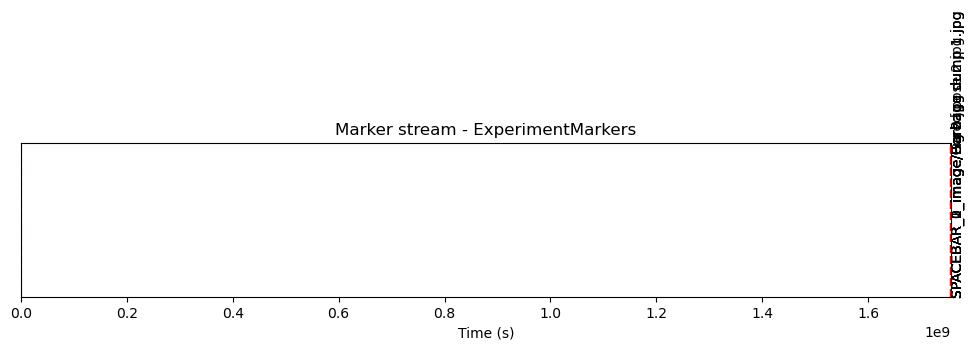

In [5]:
# Path to your file
file_path = "./data/exp001/block_Default.xdf"

# Load the XDF file
streams, fileheader = pyxdf.load_xdf(file_path)
print("Number of streams:", len(streams))

# Find global start time (earliest timestamp across all streams)
all_timestamps = []
for s in streams:
    all_timestamps.extend(s['time_stamps'])
t0 = min(all_timestamps)
print(f"Global start time (t0): {t0}")

for i, stream in enumerate(streams):
    name = stream['info']['name'][0]
    n_channels = int(stream['info']['channel_count'][0])
    time_series = stream['time_series']
    time_stamps = stream['time_stamps'] - t0  # ✅ shift timestamps to start at 0

    print(f"\nStream {i+1}: {name}")
    print(f"  Channels: {n_channels}")
    print(f"  Samples: {len(time_series)}")

    if isinstance(time_series[0], (list, np.ndarray)) and isinstance(time_series[0][0], (float, int)):
        # Continuous stream
        time_series = np.array(time_series)
        plt.figure(figsize=(12, 6))
        for ch in range(n_channels):
            plt.plot(time_stamps, time_series[:, ch], label=f"Channel {ch+1}")

        plt.title(f"Signal over time - {name}")
        plt.xlabel("Time (s)")
        plt.ylabel("Signal")
        plt.xlim([0, time_stamps[-1]])  # ✅ only show experiment time range
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

    else:
        # Marker stream
        print("  Detected marker stream")
        for t, marker in zip(time_stamps, time_series):
            print(f"    {t:.3f}s — {marker[0]}")

        plt.figure(figsize=(12, 2))
        for t, marker in zip(time_stamps, time_series):
            plt.axvline(x=t, color='r', linestyle='--')
            plt.text(t, 0, marker[0], rotation=90, verticalalignment='bottom')

        plt.title(f"Marker stream - {name}")
        plt.xlabel("Time (s)")
        plt.xlim([0, max(time_stamps)])  # ✅ set x-axis range to experiment duration
        plt.yticks([])
        plt.tight_layout()
        plt.show()